# Nairaland Natural Language Processing.
Nairaland is an online community created by Seun Osewa in March 2005.
Nairaland has 2,290,419 registered members and 5,027,714 topics created as at July 9th, 2019 and is ranked as the 10th most visited site in Nigeria as at August 2018,(and the 4th most visited indigenous site) according to Alexa.com.
## The goal of this project is to perform end to end data science and analysis using the popular Python Libraries
1. Data Extraction using Web Scraping - BeautifulSoup
2. Data Analysis and Cleansing - NLTK and Pandas
3. Plotting - Bokeh
4. Classification/CLustering - Sklearn and BERT


In [ ]:
# Import libraries to be used 
import bs4 as bs
import sys, io
from urllib.request import Request, urlopen
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import pandas as pd 
#sys.stdout = io.TextIOWrapper(sys.stdout.buffer,'cp1252','backslashreplace')
users = []
topics = []
urls = []
url = 'http://www.nairaland.com'

In [ ]:
# Read url and output beautifulsoup object
def process_url(url):
    req =  Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    sauce = urlopen(req).read()
    webpage = sauce.decode('utf-8')
    soup = bs.BeautifulSoup(sauce,'lxml').encode("utf-8")
    soup = bs.BeautifulSoup(sauce,'lxml')
    return soup

# Articles in the frontpage
frontpage = process_url(url)
for article in frontpage.find_all('td', class_= 'featured w'):
    for link in article.find_all("a"):
        topics.append(link.text)
        urls.append(link['href'])

In [70]:
# Process pagination
def paginate(something):
    pages = []
    for link in something.find_all("a"):
        if link.has_attr('href') and link['href'].startswith('/links/'):
            page = url + link['href']
            pages.append(page)
    return pages

# Append links from other pages to urls list
for page in paginate(frontpage):
    pug  = process_url(page)
    for pg in pug.find_all('td', class_=''):
        for lk in pg.find_all("a"):
            topics.append(lk.text)
            urls.append(lk['href'])

In [71]:
# Process each post: username, number of replies and initial post.
def process_topic(url):
    replies = []
    content = []
    mix = process_url(url)
    # Get the number of replies i.e excluding the original post
    for mi in mix.find_all('a', class_='user'):
        replies.append(mi.text)
    op = replies[0]
    no_replies = len(replies) - 1
    # Get the date and time of post 
    for mi in mix.find_all('span', class_ = 's')[0].next:
        time_posted  = mi
        date_posted = mi.next.next.text
    # Get post content
    for im in mix.find_all('div', class_ = 'narrow')[0]:
        content.append(im.string)
    return op, time_posted, date_posted,no_replies,content

In [82]:
sim = []
for url in urls[:200]:
    misy = process_topic(url)
    sim.append(misy)
    #print(misy)

In [83]:
#Create pandas dataframe 
full_text = pd.DataFrame(sim, columns =['Username','Time','Date','Replies','Post']) 
# Write dataframe to csv
full_text.to_csv('Nairaland.csv')

In [85]:
full_text.head()

,Username,Time,Date,Replies,Post
0,References,10:19pm,Jul 09,29,"[The body of Mrs. Elizabeth Ndubuisi Chukwu, t..."
1,GistOffer,8:28am,Jul 09,31,[Beautiful endowed lady who displays her cleav...
2,Breakingfamous,9:07pm,Jul 09,27,"[None, None, Source: , http://www.thefamousnai..."
3,GISTBL0G,10:34pm,Jul 09,30,[The popular and well sought after ‘Amigos Sup...
4,CotenantNIG,9:18pm,Jul 09,30,"[Most Dangerous Roads in Lagos, None, None, No..."


In [ ]:
# Clean and convert the Time and Date columns
def clean_date():
    pass

In [ ]:
# Clean the post by stripping the square braces and none values
def clean post():
    pass

In [ ]:
#full_text['Date'] = full_text['Date'].apply(clean_date, axis = 1)

In [51]:
#Remove stop words and tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
example_sent = "This is a sample sentence, showing off the stop words filtration."
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(example_sent)  
filtered_sentence = []  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

In [40]:
wordcloud__ = WordCloud(  background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(sim[0]))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

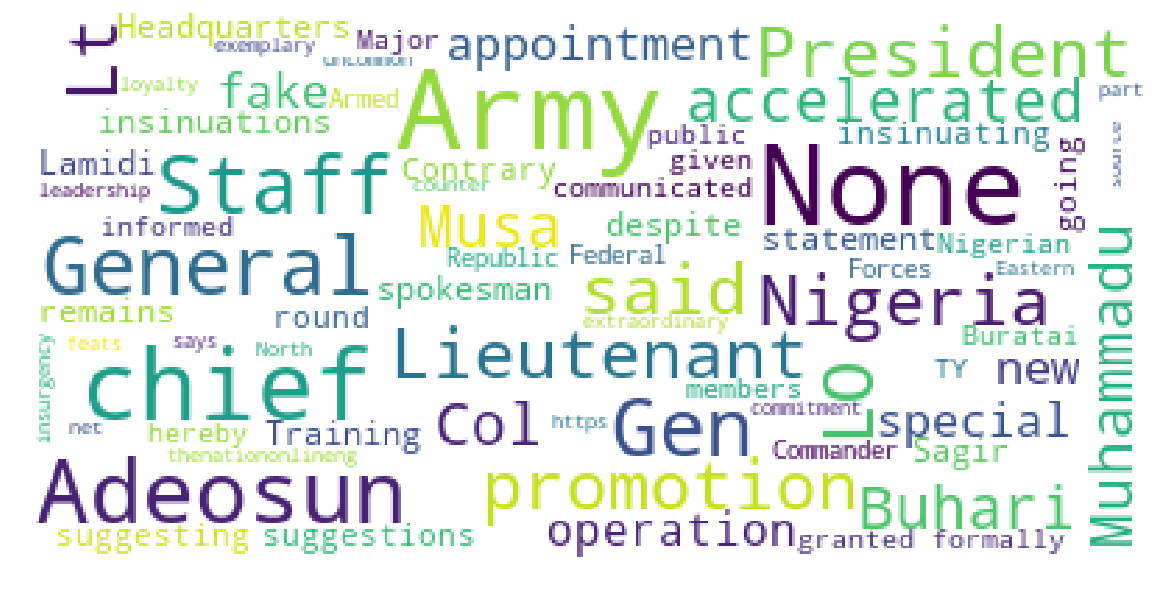

In [41]:
cloud_plot(wordcloud__)

In [ ]:
#Some plotting 